# Play around with fake data

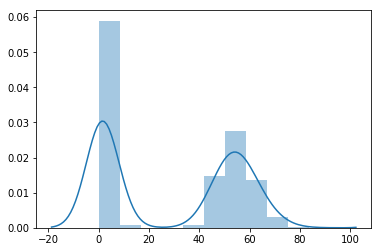

In [32]:
from numpy.random import lognormal
import seaborn as sns
import numpy as np
from models.mm import LogNormalMM
import matplotlib.pyplot as plt

mu1, sigma1 = 0, 1 # mu and sigma
s1 = lognormal(mu1, sigma1, 1000)
mu2, sigma2 = 4, 0.125
s2 = lognormal(mu2, sigma2, 1000)

s = np.concatenate((s1, s2), axis = 0)

sns.distplot(s)

## Note: Y = lnX yields a normal distribution with parameters mu and sigma

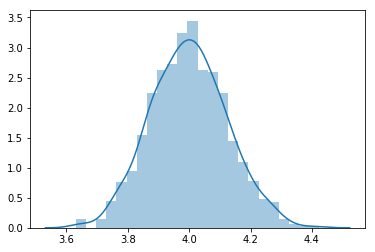

In [33]:
y = np.log(s2)
sns.distplot(y)

In [34]:
np.sqrt(np.var(y))

0.12386135979309384

In [35]:
s = np.concatenate((s1, s2), axis = 0)
y = np.log(s)
print(np.mean(y), np.var(y))

2.035479084592645 4.33980328789444


## Using data to fit the model

Model API:  <br> <br>
logNormalMM.fit(data, max_iterations, verbose) <br> <br>
logNormalMM.fit_predict(data, max_iterations, verbose) <br>

In [36]:
from models.mm import LogNormalMM
log_mm = LogNormalMM(tol=1e-15)
prediction = log_mm.fit_predict(s, max_iterations=50, verbose=False)

----------Log-Normal Mixture Model Successfully Fit-------------
Distribution 1: LogNormal(3.3473083136329267, 1.2890273844767577), mean: 8.655092383225416, variance: 934.1318984251966
 Distribution 2: LogNormal(-0.29438160149578646, 0.7821657095129025), mean: 1.3888889225602292, variance: 0.33759507023103363


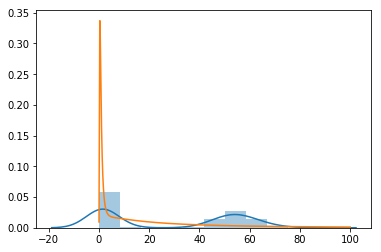

In [37]:
sns.distplot(s)
x = np.linspace(-20, 100, 2000)
log_mix = [log_mm.pdf(i) for i in x]
plt.plot(x, log_mix)

In [38]:
np.unique(prediction, return_counts=True)

(array([0, 1]), array([1282,  718]))

# Empirical Experiment From Weibo Data

Iteration 0: Mixture: LogNormal(0.3085251362482775, 0.575399036019453), mean: 4.79381311570315, variance: 4.704586241768393, LogNormal(0.36542887091170123, 0.43190779667952534), mean: 2.9824477354495627, variance: 0.7949992288601503, mix = 0.47923778902180786
Iteration 1: Mixture: LogNormal(0.4010796898413625, 0.5762127912993286), mean: 4.79381311570315, variance: 4.704586241768393, LogNormal(0.2802882192747498, 0.42459864558187616), mean: 2.9824477354495627, variance: 0.7949992288601503, mix = 0.4790920367001833
----------Log-Normal Mixture Model Successfully Fit-------------
Distribution 1: LogNormal(0.4010796898413625, 0.5762127912993286), mean: 4.79381311570315, variance: 4.704586241768393
 Distribution 2: LogNormal(0.2802882192747498, 0.42459864558187616), mean: 2.9824477354495627, variance: 0.7949992288601503


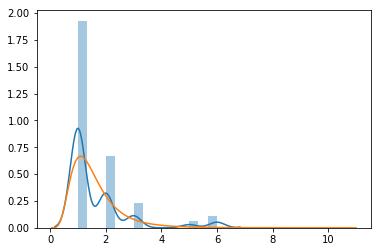

In [24]:
from models.mm import LogNormalMM
import numpy as np
import matplotlib.pyplot as plt
from models.models import DataLoader
import seaborn as sns
from glob import glob

DATA_PATH="./repost/"

loader = DataLoader(DATA_PATH)

real_data, pois, pid = loader.get_data(0)

## Fit the log normal mixture model
real_data = np.array(real_data)

logmm = LogNormalMM(tol=1e-15)

prediction = logmm.fit_predict(real_data)
    
sns.distplot(real_data)
x = np.linspace(min(real_data)-5, max(real_data)+5, len(real_data))
log_mix = [logmm.pdf(i) for i in x]
plt.plot(x, log_mix)

In [6]:
from sklearn.mixture import GaussianMixture

In [1]:
from models.mm import LogMM
import numpy as np
mu, sigma = 3., 1. # mean and standard deviation
s1 = np.random.lognormal(mu, sigma, 1000)
mu, sigma = 10, 0.5
s2 = np.random.lognormal(mu, sigma, 1000)

In [6]:
s = np.concatenate((s1, s2), axis=0)

In [11]:
Log_model = LogMM(n_components=2, max_iter=1000, tol=1e-10)
Log_model.fit(s)

Start fitting the data to logNormal mixture model.
--------------------Parameters-------------------------
n_components = 2,tolerance=1e-10, max_iter=1000, init_means = [   33.49547386 25145.85242999], init_variance = [2.51213202e+08 2.51213202e+08], init_weights = [0.5 0.5]
-------------------------------------------------------
-1386.2943611198905 -35431.48562497551
[[0.77872041 0.22127959]
 [0.77874379 0.22125621]
 [0.77873902 0.22126098]
 ...
 [0.77861241 0.22138759]
 [0.77858571 0.22141429]
 [0.77859252 0.22140748]]
-1057.1999820628953 -166182479.9301945
[[1.e-10 1.e+00]
 [1.e-10 1.e+00]
 [1.e-10 1.e+00]
 ...
 [1.e-10 1.e+00]
 [1.e-10 1.e+00]
 [1.e-10 1.e+00]]
-4.8052317088817905e-06 -34712.03372718863
[[1.00037560e-10 1.00000000e+00]
 [1.00037552e-10 1.00000000e+00]
 [1.00037554e-10 1.00000000e+00]
 ...
 [1.00037598e-10 1.00000000e+00]
 [1.00037607e-10 1.00000000e+00]
 [1.00037605e-10 1.00000000e+00]]
-4.806914090662567e-06 -34712.033556105576
[[1.00037559e-10 1.00000000e+00]
 [1

In [12]:
Log_model._best_iter

4

In [27]:
GMM = GaussianMixture(n_components=2, covariance_type="spherical")

In [28]:
GMM.fit(real_data.reshape((-1, 1)))

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [29]:
GMM.means_

array([[1.        ],
       [2.24968257]])

In [30]:
print(GMM.precisions_)
print(GMM.weights_)

[1.00000000e+06 2.28421798e+00]
[0.97560356 0.02439644]


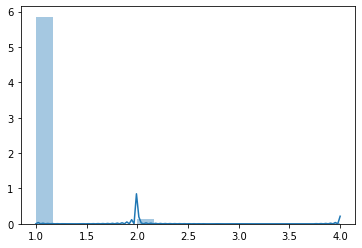

In [31]:
sns.distplot(real_data)

## Log_model._best_iter

In [3]:
Log_model._weights

array([nan, nan])

In [4]:
Log_model._vars

array([nan, nan])

# Single Log Normal

In [2]:
from models.mm import LogNormal, LogNormalMM
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

mu1, sigma1 = 0, 1 # mu and sigma
s1 = np.random.lognormal(mu1, sigma1, 1000)
mu2, sigma2 = 4, 0.125

s2 = np.random.lognormal(mu2, sigma2, 1000)

best_single = LogNormal(mu1, sigma1)

x = np.linspace(-5, 800, 1000)

log_single = [best_single.pdf(i) for i in x]

sns.distplot(s1)
sns.distplot(s2)
plt.xlim([0, 100])
plt.plot(x, log_single, label='single gaussian')

/afs/crc.nd.edu/group/dmsquare/vol3/bni/dynamic_origin/prediction/models/mm.py:231: RuntimeWarning: invalid value encountered in log
  u = (np.log(datum)-self.mu) / abs(self.sigma)


In [8]:
s = np.concatenate((s1, s2), axis = 0)

# Check out the fitting process
n_iterations = 20
best_mix = None
best_loglike = float('-inf')
mix = LogNormalMM(s)
for _ in range(n_iterations):
    try:
        #train!
        mix.iterate(verbose=True)
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix
        
    except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
        pass

LogNormal(0.5913812043895333, 0.6487900701602367), mean: 2.229651916334742, variance: 2.60188125908962 LogNormal(5.01327154116453, 0.2385490964066598), mean: 154.73660933425887, variance: 1402.029688686859
Mixture: LogNormal(0.21284159851288326, 1.313514918164214), mean: 2.229651916334742, variance: 2.60188125908962, LogNormal(4.018069361319494, 0.11122220200507243), mean: 154.73660933425887, variance: 1402.029688686859, mix = 0.5325965293435426
Mixture: LogNormal(0.012945849724028093, 1.0340195845510014), mean: 2.229651916334742, variance: 2.60188125908962, LogNormal(4.004417193003693, 0.12178050554620108), mean: 154.73660933425887, variance: 1402.029688686859, mix = 0.5043250366574548
Mixture: LogNormal(-0.018166327120519236, 0.9793134065011664), mean: 2.229651916334742, variance: 2.60188125908962, LogNormal(4.002689389403308, 0.12403041771836044), mean: 154.73660933425887, variance: 1402.029688686859, mix = 0.5002097239279024
Mixture: LogNormal(-0.019125398498304823, 0.9775916643695

In [9]:
print(mix)

Mixture: LogNormal(-0.01914594493029148, 0.9775548151687593), mean: 2.229651916334742, variance: 2.60188125908962, LogNormal(4.002620814666647, 0.12412356043361243), mean: 154.73660933425887, variance: 1402.029688686859, mix = 0.5000793614847048


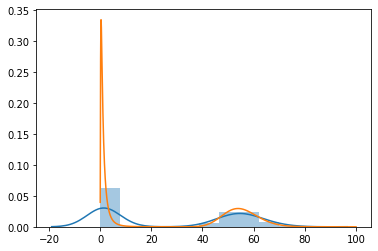

In [10]:
sns.distplot(s)
x = np.linspace(0, 100, 2000)
log_mix = [mix.pdf(i) for i in x]
plt.plot(x, log_mix)

In [11]:
0.5*mix.one.pdf(20) + 0.5 * mix.two.pdf(20)

8.775533160076639e-05

In [12]:
mix.pdf(20)

8.776926038757947e-05